## Day2 ロジスティック回帰の紹介

### Step1 Irisデータセットを読み込む

In [1]:
# ライブラリを読み込む
import numpy as np
import pandas as pd

In [2]:
# アイリスデータを読み込む
from sklearn.datasets import load_iris

In [3]:
#データセットからDataFrameを作りましょう
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_target = pd.DataFrame(iris.target, columns=['Species'])

In [4]:
# データをまとめてみる
iris_df = pd.concat([iris_data,iris_target], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Step 2: scikit-learnでロジスティック回帰をやってみよう

説明変数Xと目的変数Yを準備します。<br>
データを学習用とテストように分けておきましょう。全体の30％がテストデータになるようにします。

In [5]:
# 機械学習ライブラリを読み込む
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
# 説明変数データ作成
X = iris_df.drop(['Species'],axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# 目的変数データ作成
y = iris_df['Species']
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int64

In [8]:
#学習用データとテスト用データを作る
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [9]:
#学習させる
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/dragonnight/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dragonnight/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#モデルの精度を確認する
#評価指標ライブラリを読み込む
from sklearn import metrics

y_pred = model.predict(X_test)

# 精度を計算してみる
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [11]:
y_pred

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1])

適当なデータで分類してみましょう

In [12]:
#test = np.array([6.4,3.4,10.3,1.2])
#test = pd.DataFrame([[6.4,3.4,10.3,1.2]], columns=iris.feature_names)
print(model.predict([[3.4, 3.4, 1.3, 1.2]]))

[0]


### 演習
- train_test_splitのtest_sizeやrandom_stateの値を変えてモデルの精度の変化を確認してみましょう。
- 適当なデータで分類した結果を確認しでみよう。

### END

### 参考　散布図やヒストグラムの書き方

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

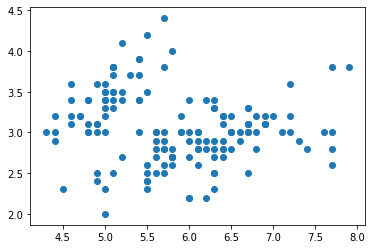

In [14]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

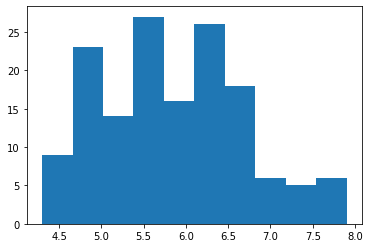

In [15]:
plt.hist(iris_df['sepal length (cm)'])

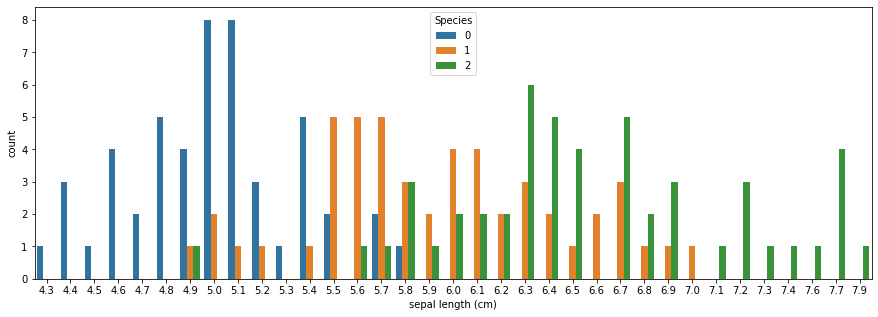

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(iris_df['sepal length (cm)'], data=iris_df, hue='Species')